0.009283177667225561


/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_50108/1993915877.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Final plot/ecc46.png')


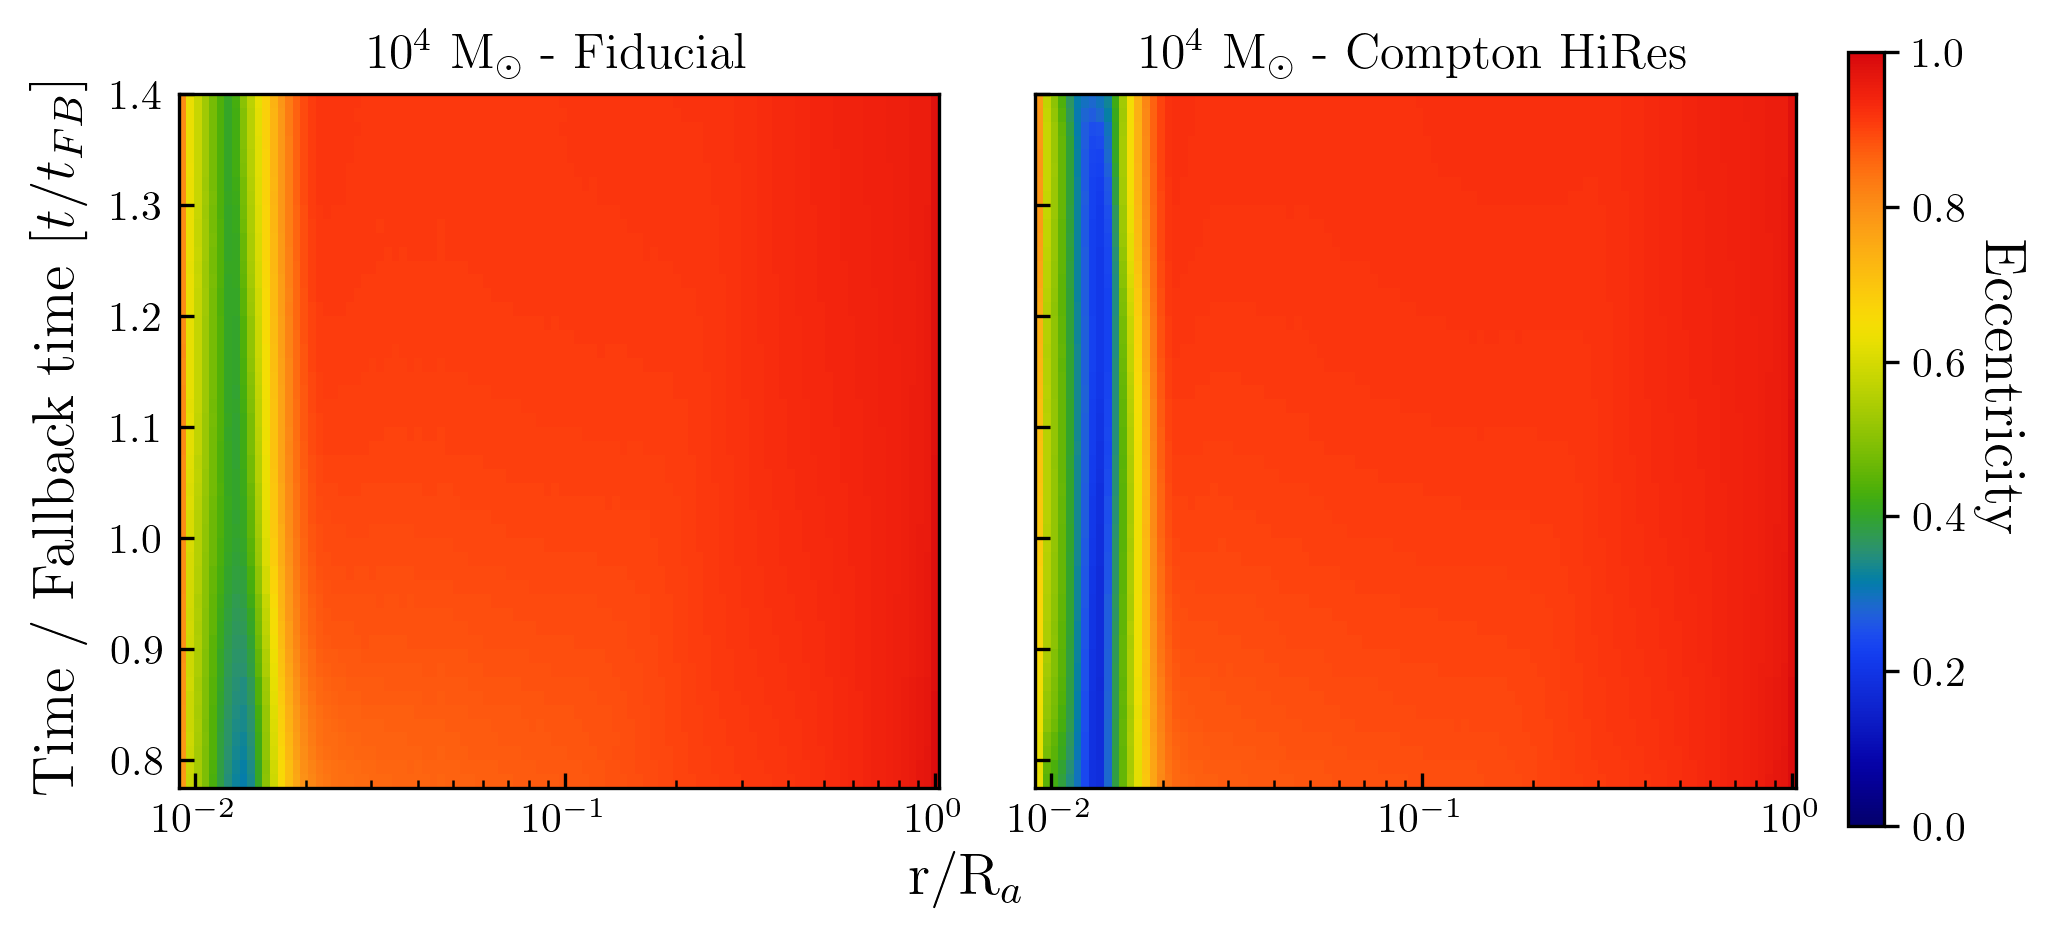

In [30]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  6 16:43:27 2023

@author: konstantinos
"""

import numpy as np
import matplotlib.pyplot as plt
import colorcet
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.facecolor']='whitesmoke'

kind = '4chr' # or 4chr
if kind == '64':
    pre = 'data/ef8'
    ecc4 = np.loadtxt(pre + '/ecc4-fid.txt')
    days4 = np.loadtxt(pre + '/eccdays4-fid.txt')
    
    ecc6 = np.load(pre + '/ecc6-fid.npy', allow_pickle=True)
    
    Mbh = 1e4
    t_fall = 40 * (Mbh/1e6)**(0.5) # days EMR+20 p13
    Rt4 =  Mbh**(1/3) # Msol = 1, Rsol = 1
    apocenter = 2 * Rt4 * Mbh**(1/3)
    
    radii4_start = np.log10(0.4*Rt4)
    radii4_stop = np.log10(apocenter) # apocenter
    radii4 = np.logspace(radii4_start, radii4_stop, 100) / apocenter
    # radii4 = np.linspace(0.2*2*Rt4, apocenter, 100) 
    
    
    colarr6 = []
    days6 = []
    Mbh = 1e6
    t_fall = 40 * (Mbh/1e6)**(0.5) # days EMR+20 p13
    Rt6 =  Mbh**(1/3) # Msol = 1, Rsol = 1
    apocenter = 2 * Rt6 * Mbh**(1/3)
    
    radii6_start = np.log10(0.2*2*Rt6)
    radii6_stop = np.log10(apocenter)
    radii6 = np.logspace(radii6_start, radii6_stop, 100) / apocenter
    
    # radii6 = np.logspace()
    # radii6 = np.linspace(0.2*2*Rt6, apocenter, 100) / (2*Rt6)
    # Extract
    for i in range(len(ecc6[1])):
        colarr = np.nan_to_num(ecc6[1][i])
        colarr6.append(colarr)
        days6.append(ecc6[0][i]/t_fall)
        
        
    ####
    fig, ax = plt.subplots(1,2, tight_layout=True, sharey=True)
    stop = 95
    
    img1 = ax[0].pcolormesh(radii4,days4,ecc4,
                    cmap = 'cet_rainbow4', vmin = 0, vmax = 1)
    
        
    img2 = ax[1].pcolormesh(radii6,days6,colarr6,
                    cmap = 'cet_rainbow4', vmin = 0, vmax = 1)
    
    cax = fig.add_axes([0.99, 0.065, 0.02, 0.86])
    fig.colorbar(img2, cax=cax)
    # ax[1].set_xlim(4e-3, 1)
    ax[1].set_ylim(0.7, days6[-1])
    
    ax[0].set_xscale('log')
    ax[1].set_xscale('log')
    
    # Distance text 
    ionx = 1.06
    iony = 0.4
    #txt1.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    txt1 = fig.text(ionx, iony, 'Eccentricity', fontsize = 14,
    		    color='k', fontfamily = 'monospace', rotation = 270)
    
    # Axis labels
    fig.text(0.5, -0.01, r'r/R$_a$', ha='center', fontsize = 14)
    fig.text(-0.02, 0.5, r' Time / Fallback time $\left[ t/t_{FB} \right]$', va='center', rotation='vertical', fontsize = 14)
    ax[0].tick_params(axis = 'both', which = 'both', direction='in')
    ax[1].tick_params(axis = 'both', which = 'both', direction='in')
    ax[0].set_title(r'$10^4$ M$_\odot$')
    ax[1].set_title(r'$10^6$ M$_\odot$')
    # fig.suptitle('Mass Weigh Eccentricity', fontsize = 17)
if kind == '4chr':
    pre = 'data/ef8'
    ecc4 = np.loadtxt(pre + '/ecc4fid.txt')
    days4 = np.loadtxt(pre + '/eccdays4fid.txt')
    
    ecc4chr = np.loadtxt(pre + '/ecc4S60ComptonHires.txt')
    days4chr = np.loadtxt(pre + '/eccdays4S60ComptonHires.txt')
    
    Mbh = 1e4
    t_fall = 40 * (Mbh/1e6)**(0.5) # days EMR+20 p13
    Rt4 =  Mbh**(1/3) # Msol = 1, Rsol = 1
    apocenter = 2 * Rt4 * Mbh**(1/3)
    radii4_start = np.log10(0.4*Rt4)
    radii4_stop = np.log10(apocenter) # apocenter
    radii4 = np.logspace(radii4_start, radii4_stop, 100) / apocenter
    # radii4 = np.linspace(0.2*2*Rt4, apocenter, 100) 
 
    ####
    fig, ax = plt.subplots(1,2, tight_layout=True, sharey=True)
    stop = 95
    
    img1 = ax[0].pcolormesh(radii4,days4,ecc4,
                    cmap = 'cet_rainbow4', vmin = 0, vmax = 1)
    
        
    img2 = ax[1].pcolormesh(radii4,days4chr,ecc4chr,
                    cmap = 'cet_rainbow4', vmin = 0, vmax = 1)
    
    cax = fig.add_axes([0.99, 0.065, 0.02, 0.86])
    fig.colorbar(img2, cax=cax)
    # ax[1].set_xlim(4e-3, 1)
    ax[1].set_ylim(days4chr[0], days4chr[-1])
    
    ax[0].set_xscale('log')
    ax[1].set_xscale('log')
    
    # Distance text 
    ionx = 1.06
    iony = 0.4
    #txt1.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
    txt1 = fig.text(ionx, iony, 'Eccentricity', fontsize = 14,
    		    color='k', fontfamily = 'monospace', rotation = 270)
    
    # Axis labels
    fig.text(0.5, -0.01, r'r/R$_a$', ha='center', fontsize = 14)
    fig.text(-0.02, 0.5, r' Time / Fallback time $\left[ t/t_{FB} \right]$', va='center', rotation='vertical', fontsize = 14)
    ax[0].tick_params(axis = 'both', which = 'both', direction='in')
    ax[1].tick_params(axis = 'both', which = 'both', direction='in')
    ax[0].set_title(r'$10^4$ M$_\odot$ - Fiducial ')
    ax[1].set_title(r'$10^4$  M$_\odot$ - Compton HiRes')
    # fig.suptitle('Mass Weigh Eccentricity', fontsize = 17)
    print(np.min(radii4))
    plt.savefig('Final plot/ecc46.png')
    plt.show()

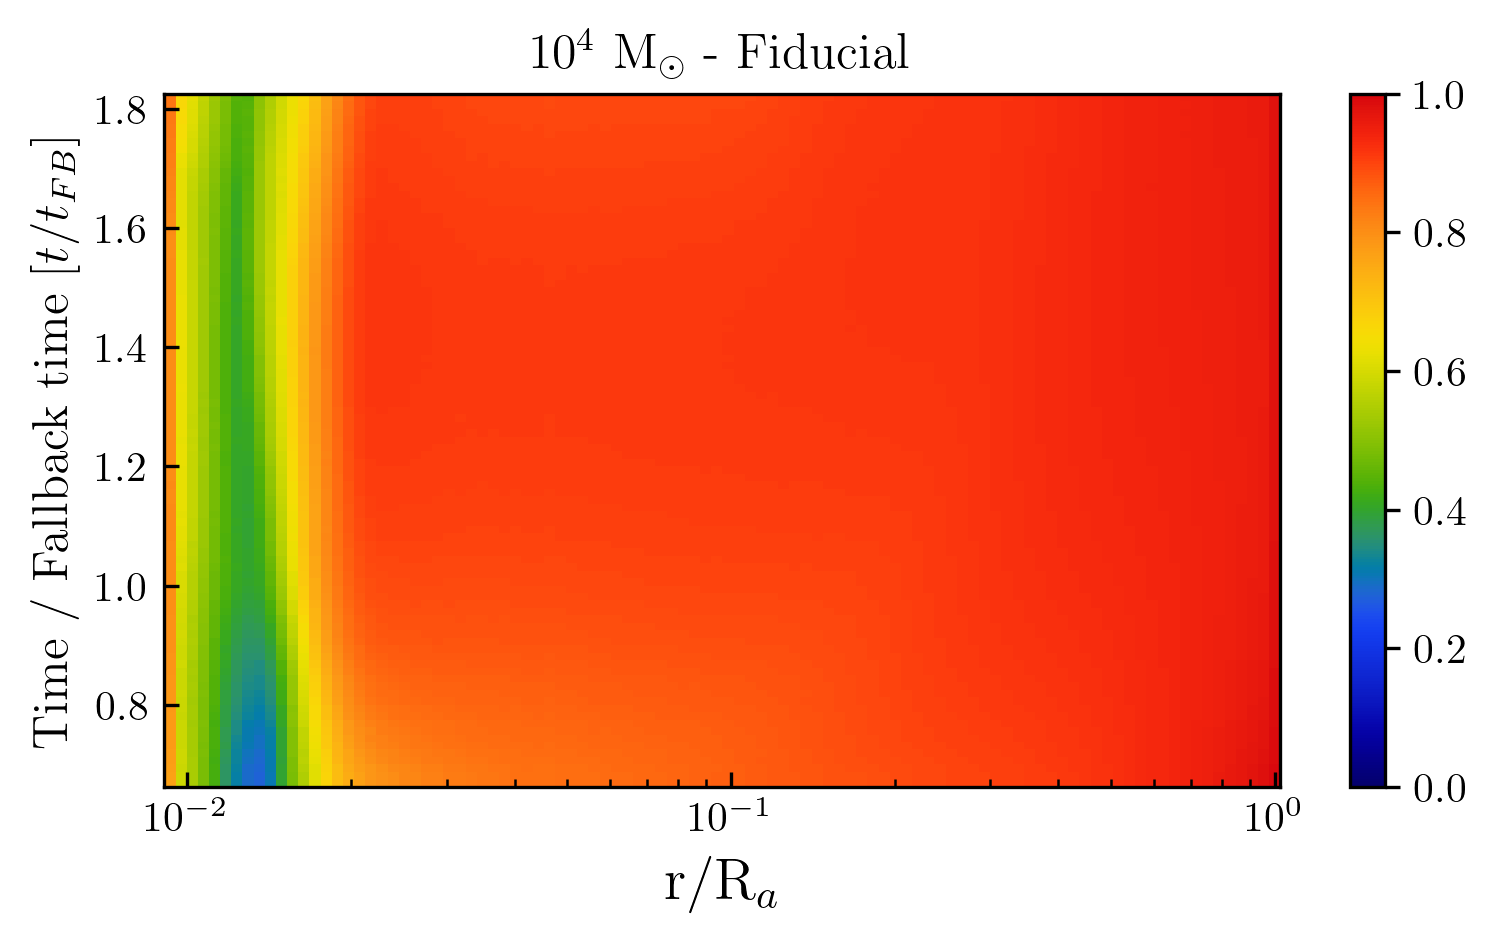

In [28]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  6 16:43:27 2023

@author: konstantinos
"""

import numpy as np
import matplotlib.pyplot as plt
import colorcet
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.facecolor']='whitesmoke'

pre = 'data/ef8'
ecc4 = np.loadtxt(pre + '/ecc4fid.txt')
days4 = np.loadtxt(pre + '/eccdays4fid.txt')

ecc4chr = np.loadtxt(pre + '/ecc4S60ComptonHires.txt')
days4chr = np.loadtxt(pre + '/eccdays4S60ComptonHires.txt')

Mbh = 1e4
t_fall = 40 * (Mbh/1e6)**(0.5) # days EMR+20 p13
Rt4 =  Mbh**(1/3) # Msol = 1, Rsol = 1
apocenter = 2 * Rt4 * Mbh**(1/3)
radii4_start = np.log10(0.4*Rt4)
radii4_stop = np.log10(apocenter) # apocenter
radii4 = np.logspace(radii4_start, radii4_stop, 100) / apocenter
# radii4 = np.linspace(0.2*2*Rt4, apocenter, 100) 

####
stop = 95
img1 = plt.pcolormesh(radii4,days4,ecc4,
                cmap = 'cet_rainbow4', vmin = 0, vmax = 1)

    
# img2 = ax[1].pcolormesh(radii4,days4chr,ecc4chr,
#                 cmap = 'cet_rainbow4', vmin = 0, vmax = 1)

# cax = fig.add_axes([0.99, 0.065, 0.02, 0.86])
plt.colorbar(img1)#, cax=cax)
# ax[1].set_ylim(days4chr[0], days4chr[-1])

plt.xscale('log')

# Distance text 
ionx = 1.06
iony = 0.4
#txt1.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])
# txt1 = fig.text(ionx, iony, 'Eccentricity', fontsize = 14,
#             color='k', fontfamily = 'monospace', rotation = 270)

# Axis labels
plt.xlabel( r'r/R$_a$', fontsize = 14)
plt.ylabel(r' Time / Fallback time $\left[ t/t_{FB} \right]$', fontsize = 12)
plt.tick_params(axis = 'both', which = 'both', direction='in')
plt.title(r'$10^4$ M$_\odot$ - Fiducial ')
# plt.title(r'$10^4$  M$_\odot$ - Compton HiRes')
plt.savefig('Final plot/eccfid.png')
plt.show()